In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
dataset = randn(25)

(0, 1)

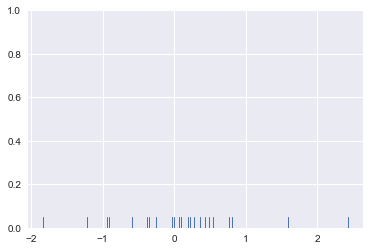

In [4]:
sns.rugplot(dataset)

plt.ylim(0,1)

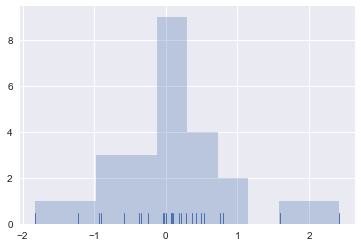

In [7]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

(0, 1)

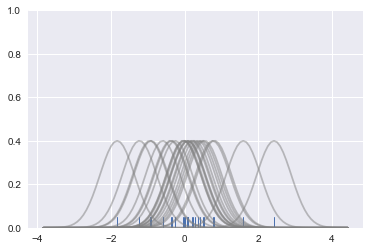

In [9]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

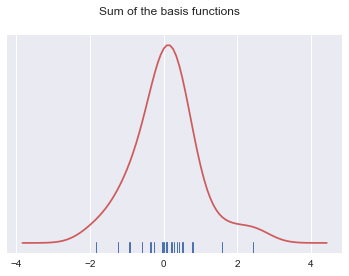

In [11]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

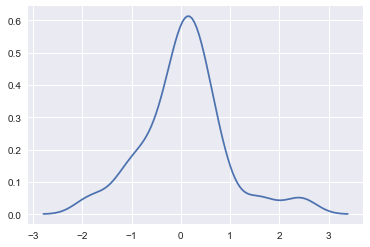

In [12]:
sns.kdeplot(dataset)

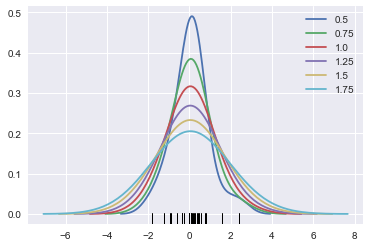

In [13]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)


In [14]:
url = 'https://en.wikipedia.org/wiki/Kernel_(statistics)'

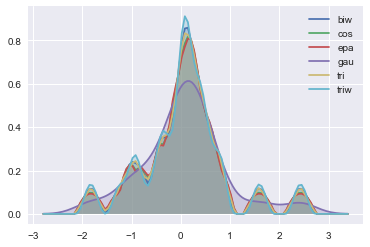

In [16]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

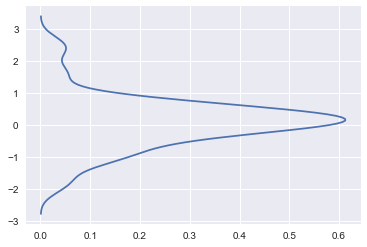

In [17]:
sns.kdeplot(dataset,vertical=True) 

In [18]:
url = 'https://en.wikipedia.org/wiki/Cumulative_distribution_function'

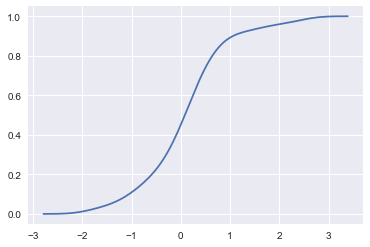

In [19]:
sns.kdeplot(dataset,cumulative = True)

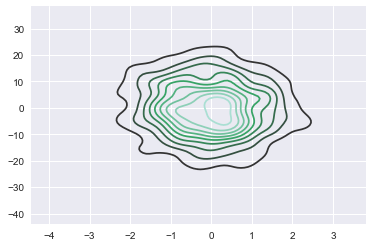

In [20]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(dframe)

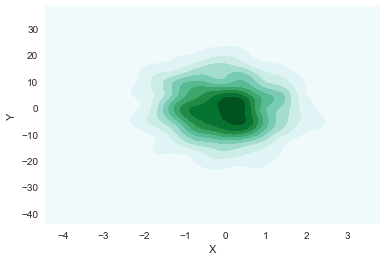

In [22]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

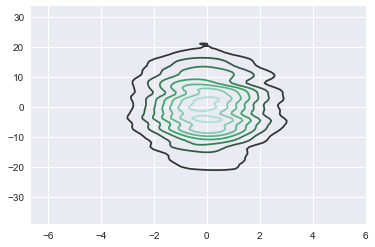

In [23]:
sns.kdeplot(dframe,bw=1)

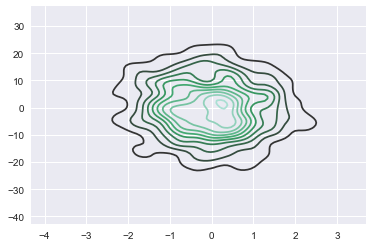

In [24]:
sns.kdeplot(dframe,bw='silverman')

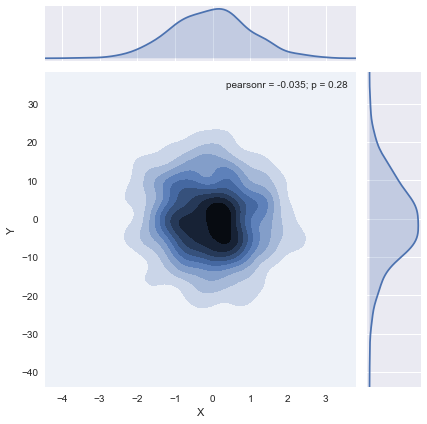

In [25]:
sns.jointplot('X','Y',dframe,kind='kde')